In [40]:
import pandas as pd
import numpy as np

In [41]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [42]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(714, 3)

In [45]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [46]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [47]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [49]:

clf = DecisionTreeClassifier()

In [50]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [51]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [52]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6387128325508606)

# **kmeans**

In [53]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [54]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]), #age
    ('second',kbin_fare,[1]) # Fare
])

In [55]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [56]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans')}

In [57]:
trf.named_transformers_['first'].n_bins #age

15

In [58]:
trf.named_transformers_['second'].n_bins # Fare

15

In [59]:
trf.named_transformers_['first'].bin_edges_ #age

array([array([ 0.42      ,  5.27754049, 11.74158654, 17.35243056, 21.55720029,
              26.64837093, 32.14464286, 37.41916667, 42.9025    , 48.1075    ,
              53.110625  , 58.090625  , 62.3875    , 67.72916667, 75.54166667,
              80.        ])                                                   ],
      dtype=object)

In [60]:
trf.named_transformers_['second'].bin_edges_ #fare

array([array([  0.        ,  11.24103919,  19.86871564,  28.06543126,
               34.90886516,  45.73788324,  59.33660546,  72.27252098,
               84.10950431, 101.00790682, 123.56362348, 144.756475  ,
              185.67419167, 237.86718333, 385.651575  , 512.3292    ])],
      dtype=object)

In [61]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [62]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [63]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
205,2.0,0.0,10.4625,0.0,"(0.42, 5.278]","(0.0, 11.241]"
173,21.0,3.0,7.9250,0.0,"(17.352, 21.557]","(0.0, 11.241]"
49,18.0,3.0,17.8000,1.0,"(17.352, 21.557]","(11.241, 19.869]"
607,27.0,5.0,30.5000,3.0,"(26.648, 32.145]","(28.065, 34.909]"
735,28.5,5.0,16.1000,1.0,"(26.648, 32.145]","(11.241, 19.869]"


In [64]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [65]:
accuracy_score(y_test,y_pred2)

0.6433566433566433

In [66]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6261150234741784)

# **uniform**

In [67]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform')
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

trf.named_transformers_['first'].n_bins

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

output.sample(5)


,age,age_trf,fare,fare_trf,age_labels,fare_labels
577,39.0,7.0,55.9000,1.0,"(37.557, 42.863]","(34.155, 68.311]"
103,33.0,6.0,8.6542,0.0,"(32.252, 37.557]","(0.0, 34.155]"
657,32.0,5.0,15.5000,0.0,"(26.947, 32.252]","(0.0, 34.155]"
672,70.0,13.0,10.5000,0.0,"(69.389, 74.695]","(0.0, 34.155]"
617,26.0,4.0,16.1000,0.0,"(21.641, 26.947]","(0.0, 34.155]"


In [68]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [69]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6359350547730829)

In [70]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6317292644757433


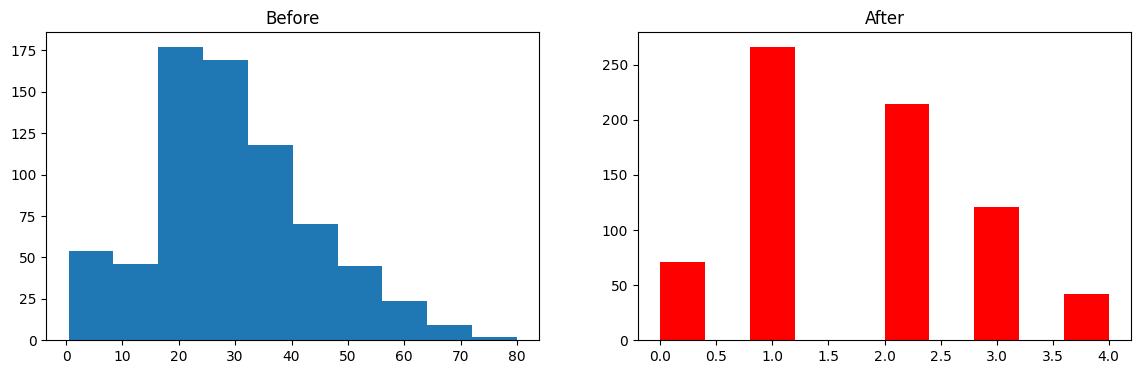

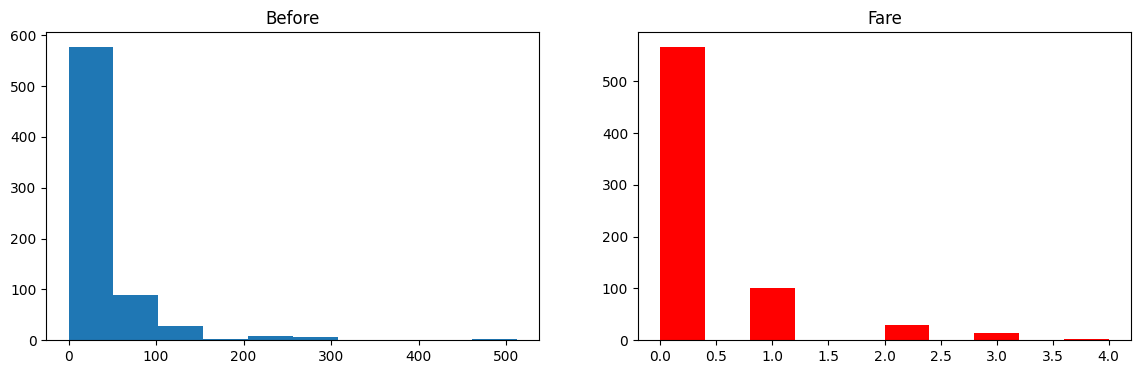

In [71]:
discretize(5,'kmeans')

# **quantile**

In [72]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

trf.named_transformers_['first'].n_bins

output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

output.sample(5)



,age,age_trf,fare,fare_trf,age_labels,fare_labels
397,46.0,12.0,26.0000,9.0,"(42.0, 47.0]","(18.75, 26.0]"
50,7.0,1.0,39.6875,11.0,"(6.0, 16.0]","(31.275, 51.479]"
771,48.0,13.0,7.8542,2.0,"(47.0, 54.0]","(7.775, 7.896]"
821,27.0,6.0,8.6625,4.0,"(25.0, 28.0]","(8.158, 10.5]"
722,34.0,9.0,13.0000,6.0,"(32.0, 35.0]","(10.5, 13.0]"


In [73]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)


In [74]:
accuracy_score(y_test,y_pred2)


X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6359154929577465)

## **quantile**

In [75]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='quantile')

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()



0.6331377151799686


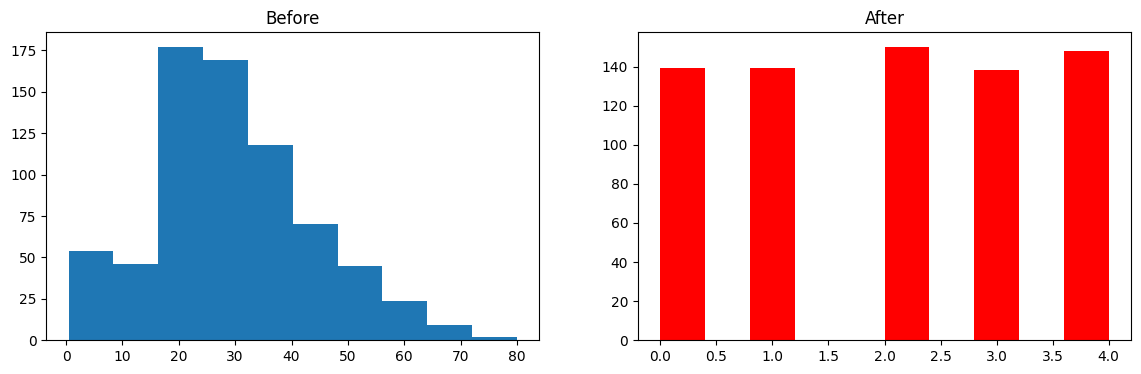

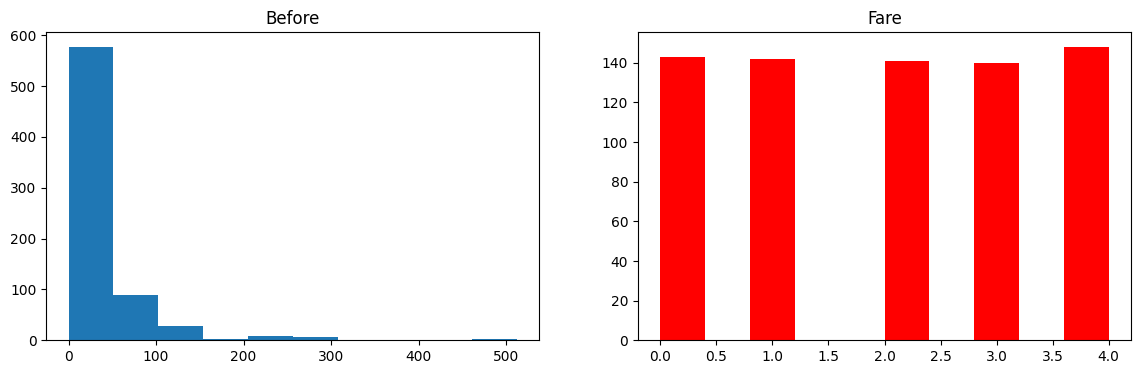

In [76]:
discretize(5,'kmeans')

## **kmeans**

In [77]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='kmeans')
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='kmeans')

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6260954616588419


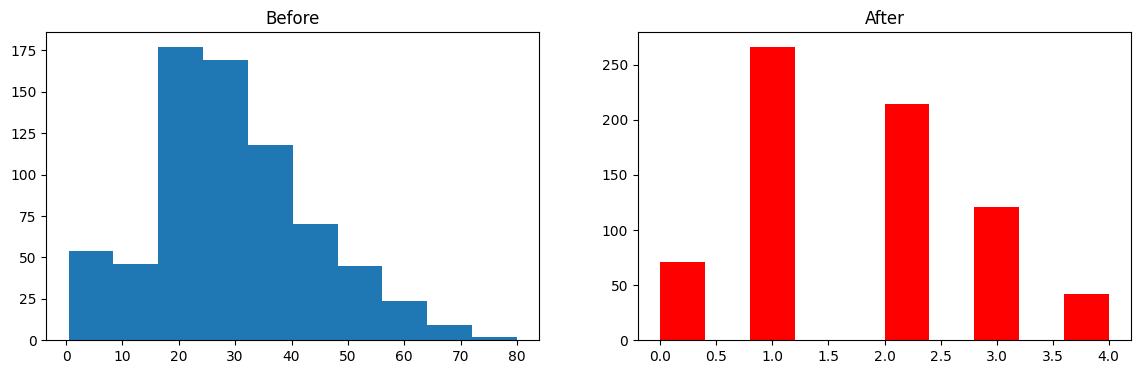

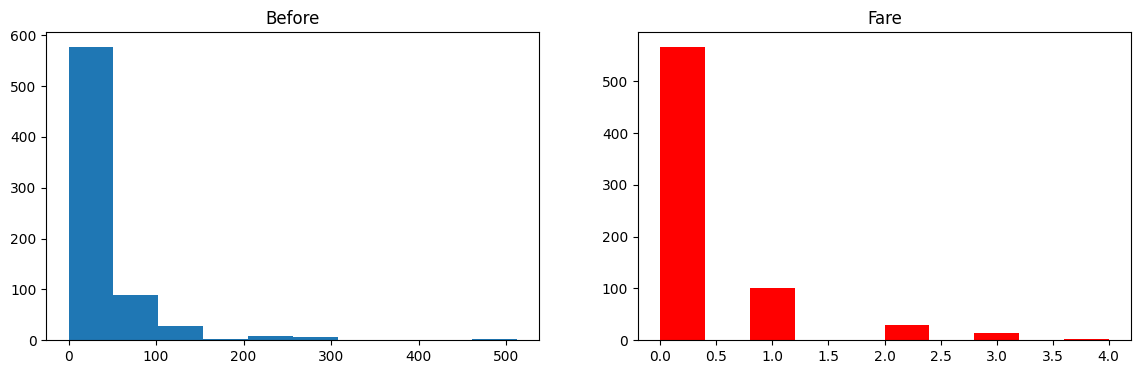

In [78]:
  discretize(5,'kmeans')

## **uniform**

In [79]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='uniform')
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy='uniform')

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6359154929577464


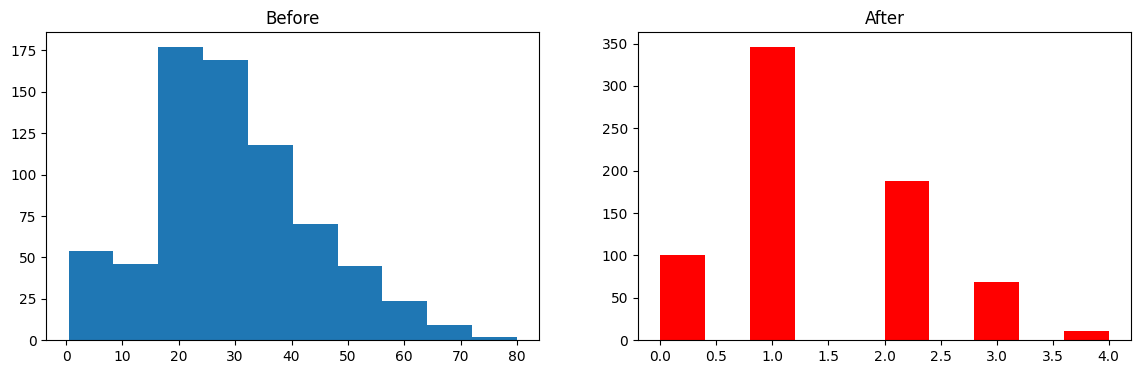

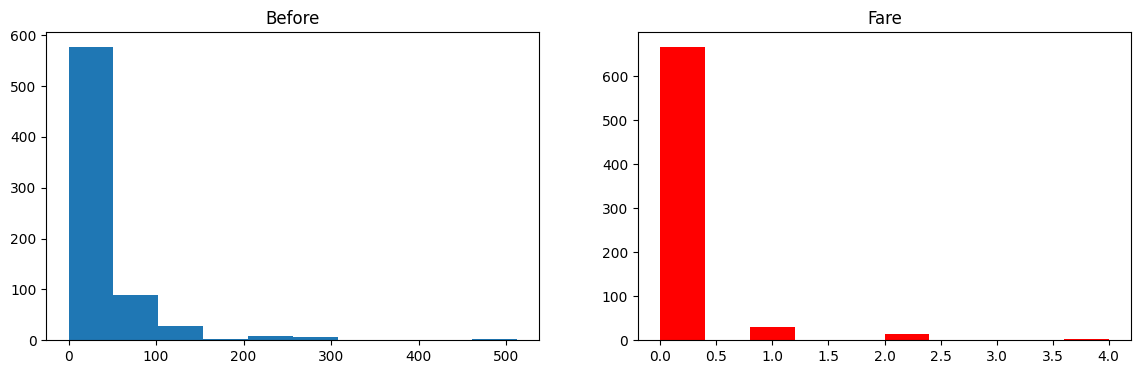

In [80]:
discretize(5,'kmeans')